## Extracción

In [46]:
# 🔧 Importar librerías necesarias
import pandas as pd
import requests
import numpy as np


# 🌐 URL de la API (archivo JSON alojado en GitHub)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# 📥 Obtener los datos de la API
response = requests.get(url)
data = response.json()

# 🧾 Convertir a DataFrame
df = pd.DataFrame(data)

# 👀 Vista previa de los datos
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Transformación

In [ ]:
# Explorar las columnas del dataset y verificar sus tipos de datos.
# Ver columnas disponibles
print("Columnas del dataset:")
print(df.columns.tolist())

#Consultar el diccionario para comprender mejor el significado de las variables.
# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Ver el diccionario dentro del notebook
with open("TelecomX_diccionario.md", "r", encoding="utf-8") as file:
    print(file.read())

#Identificar las columnas más relevantes para el análisis de evasión.
# Revisión de un ejemplo completo para entender la estructura de columnas anidadas
df.iloc[0]



Columnas del dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción ad

customerID                                           0002-ORFBO
Churn                                                        No
customer      {'gender': 'Female', 'SeniorCitizen': 0, 'Part...
phone            {'PhoneService': 'Yes', 'MultipleLines': 'No'}
internet      {'InternetService': 'DSL', 'OnlineSecurity': '...
account       {'Contract': 'One year', 'PaperlessBilling': '...
Name: 0, dtype: object

## Comprobación de incoherencias

In [48]:
# 📌 Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\n")

# 📌 Verificar filas duplicadas
# Convertimos columnas con dicts a string
df_temp = df.copy()
for col in df_temp.columns:
    if df_temp[col].apply(lambda x: isinstance(x, dict)).any():
        df_temp[col] = df_temp[col].astype(str)

print("Cantidad de filas duplicadas:", df_temp.duplicated().sum())
print("\n")

# 📌 Verificar tipos únicos en columnas categóricas (seguro con dicts)
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        
        # Evitar error si hay diccionarios en la columna
        if df[col].apply(lambda x: isinstance(x, dict)).any():
            print("⚠️ Contiene diccionarios, no se puede mostrar valores únicos directamente.")
        else:
            print(df[col].unique())
        
        print("—" * 50)


Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


Cantidad de filas duplicadas: 0


Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
——————————————————————————————————————————————————
Valores únicos en 'Churn':
['No' 'Yes' '']
——————————————————————————————————————————————————
Valores únicos en 'customer':
⚠️ Contiene diccionarios, no se puede mostrar valores únicos directamente.
——————————————————————————————————————————————————
Valores únicos en 'phone':
⚠️ Contiene diccionarios, no se puede mostrar valores únicos directamente.
——————————————————————————————————————————————————
Valores únicos en 'internet':
⚠️ Contiene diccionarios, no se puede mostrar valores únicos directamente.
——————————————————————————————————————————————————
Valores únicos en 'account':
⚠️ Contiene diccionarios, no se puede mostrar valores únicos directament

## Manejo de inconsistencias

In [49]:
# Reemplazar valores vacíos en 'Churn' por NaN
df['Churn'] = df['Churn'].replace('', np.nan)

# Eliminar filas con 'Churn' faltante (opcional, si son pocas)
df = df.dropna(subset=['Churn'])

# Expandir columnas con diccionarios
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

# Combinar con el DataFrame original
df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                customer_df, phone_df, internet_df, account_df], axis=1)

# Comprobamos que ya no existan valores problemáticos
print(df.isnull().sum())
print(df.dtypes)


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges             0
dtype: int64
customerID          object
Churn               object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Charges             object
dtype: 

In [50]:
# Eliminar caracteres como '$' y ',' antes de convertir a número
df['Charges'] = df['Charges'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Convertir a numérico (NaN si no se puede convertir)
df['Charges'] = pd.to_numeric(df['Charges'], errors='coerce')

# Eliminar filas con valores faltantes en 'Charges'
df = df.dropna(subset=['Charges'])

# Crear la columna 'Cuentas_Diarias' dividiendo entre 30
df['Cuentas_Diarias'] = df['Charges'] / 30

# Verificar los primeros valores para ambas columnas
print(df[['Charges', 'Cuentas_Diarias']].head())

# Mostrar los primeros 10 valores de la columna Charges
print(df['Charges'].head(10))

# Mostrar todos los valores únicos para verificar la conversión
print(df['Charges'].unique())


       Charges  Cuentas_Diarias
40   75.751929         2.525064
44   61.616110         2.053870
48   99.253532         3.308451
80   45.811470         1.527049
104  19.955800         0.665193
40     75.751929
44     61.616110
48     99.253532
80     45.811470
104    19.955800
144    79.247650
151    92.656733
188    50.225540
248    39.553730
290    99.754036
Name: Charges, dtype: float64
[ 75.751929  61.61611   99.253532  45.81147   19.9558    79.24765
  92.656733  50.22554   39.55373   99.754036  20.051036  45.32145
  83.55435  100.56029  100.352799  42.12962   25.9135    97.955867
  19.85252   98.05713   95.095    100.4715    99.04135   18.55689
  85.72067  102.251359  75.25242   89.13342  109.65953   20.351267
  19.41083  105.82998   39.11309   73.652    100.554304  20.054
  21.1741   110.755832 103.46603   56.05      19.152     19.019
  80.08      51.052066  86.755186  45.8581    73.853371  81.45912
  25.15553   97.555598  85.085     45.2492    76.6893    69.01108
  79.52665   48.

In [ ]:
# 1. Convertir valores textuales 'Sí' y 'No' en valores binarios (1 y 0)
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 
                 'PaperlessBilling']

for col in cols_binarias:
    df[col] = df[col].map({'Sí': 1, 'No': 0})

# 2. Normalizar valores como 'Male' / 'Female' o traducir al español si es necesario
df['gender'] = df['gender'].map({'Male': 'Masculino', 'Female': 'Femenino'})

# 3. Renombrar columnas para mayor claridad 
df = df.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'Mayor_65',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Lineas_Multiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Respaldo_En_Linea',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Television_Streaming',
    'StreamingMovies': 'Peliculas_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges': 'Cargos_Mensuales',
    'Cuentas_Diarias': 'Cargos_Diarios'
})

# 4. Verificamos el resultado
print(df.head())


     customerID  Churn     Genero  Mayor_65  Tiene_Pareja  Tiene_Dependientes  \
40   0064-YIJGF    0.0  Masculino         0           NaN                 NaN   
44   0074-HDKDG    0.0  Masculino         0           NaN                 NaN   
48   0080-OROZO    0.0   Femenino         0           0.0                 0.0   
80   0128-MKWSG    0.0   Femenino         0           0.0                 NaN   
104  0178-CIIKR    0.0   Femenino         0           0.0                 0.0   

     Meses_Contrato  Servicio_Telefono  Lineas_Multiples Servicio_Internet  \
40               27                NaN               Yes       Fiber optic   
44               25                NaN                No               DSL   
48               35                NaN                No       Fiber optic   
80               26                0.0  No phone service               DSL   
104               3                NaN                No                No   

     ...    Respaldo_En_Linea Proteccion_Dis

#📊 Carga y análisis

In [52]:
# Análisis descriptivo general
descripcion_general = df.describe(include='all')

# Análisis solo de columnas numéricas
descripcion_numerica = df.describe()

# Mostrar los resultados
print("Descripción general del DataFrame:")
print(descripcion_general)

print("\nDescripción de columnas numéricas:")
print(descripcion_numerica)


Descripción general del DataFrame:
        customerID  Churn     Genero    Mayor_65  Tiene_Pareja  \
count          335  257.0        335  335.000000         160.0   
unique         335    NaN          2         NaN           NaN   
top     0064-YIJGF    NaN  Masculino         NaN           NaN   
freq             1    NaN        177         NaN           NaN   
mean           NaN    0.0        NaN    0.149254           0.0   
std            NaN    0.0        NaN    0.356871           0.0   
min            NaN    0.0        NaN    0.000000           0.0   
25%            NaN    0.0        NaN    0.000000           0.0   
50%            NaN    0.0        NaN    0.000000           0.0   
75%            NaN    0.0        NaN    0.000000           0.0   
max            NaN    0.0        NaN    1.000000           0.0   

        Tiene_Dependientes  Meses_Contrato  Servicio_Telefono  \
count                222.0      335.000000               37.0   
unique                 NaN             NaN

C:\Users\sr031\AppData\Local\Temp\ipykernel_12052\264096405.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


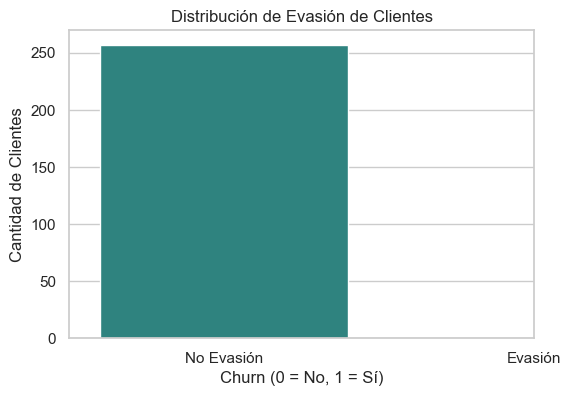

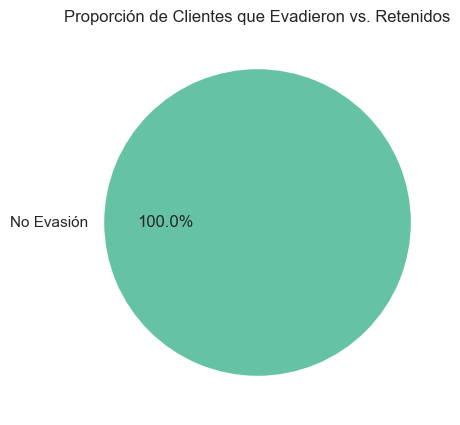

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns




# Contar valores válidos de Churn (eliminar NaN)
churn_counts = df['Churn'].dropna().value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], ['No Evasión', 'Evasión'])
plt.show()

# Gráfico de pastel con etiquetas dinámicas según valores reales
labels = ['No Evasión' if val == 0 else 'Evasión' for val in churn_counts.index]

plt.figure(figsize=(5,5))
plt.pie(churn_counts.values, labels=labels, autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Proporción de Clientes que Evadieron vs. Retenidos')
plt.show()


## Recuento de evasión por variables categóricas

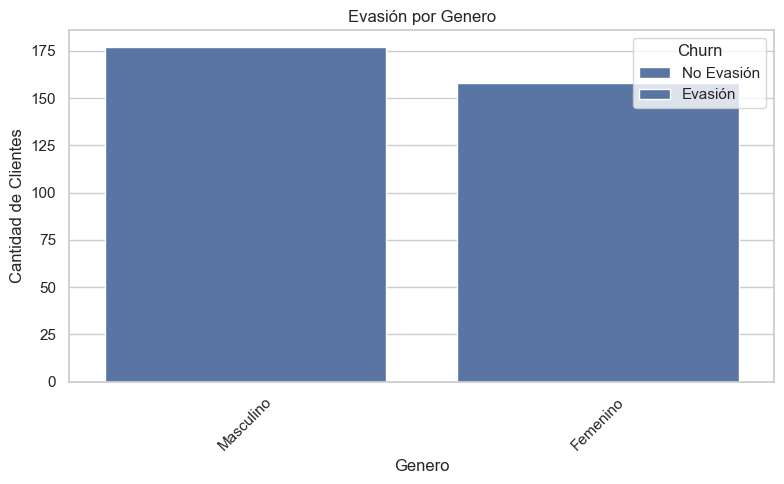

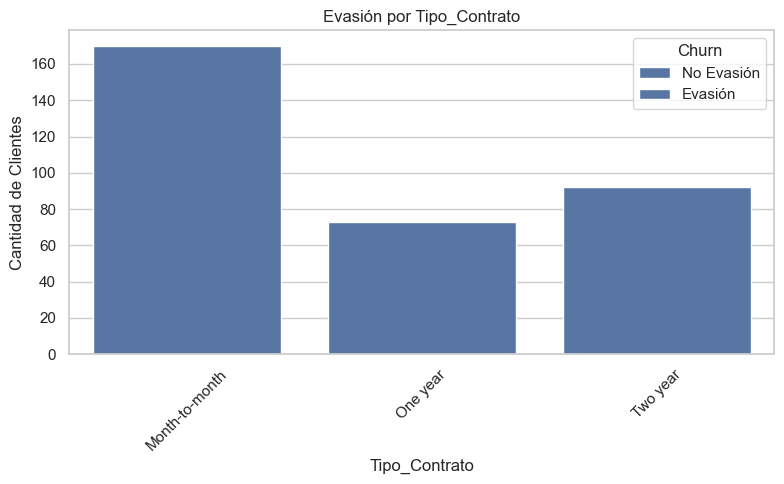

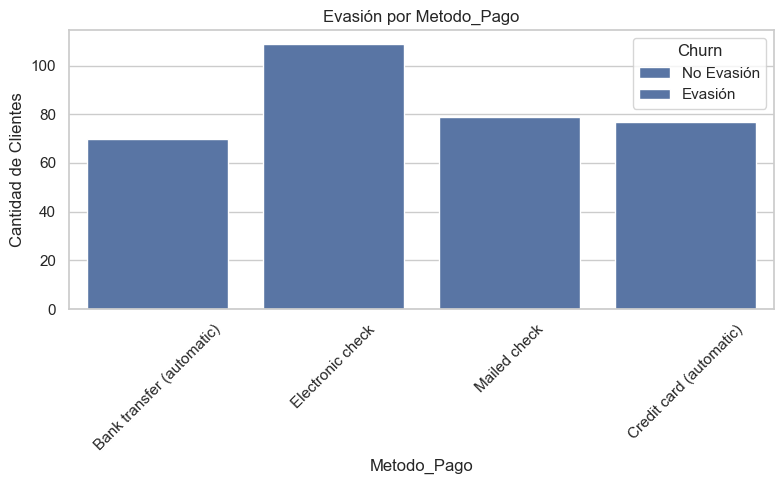

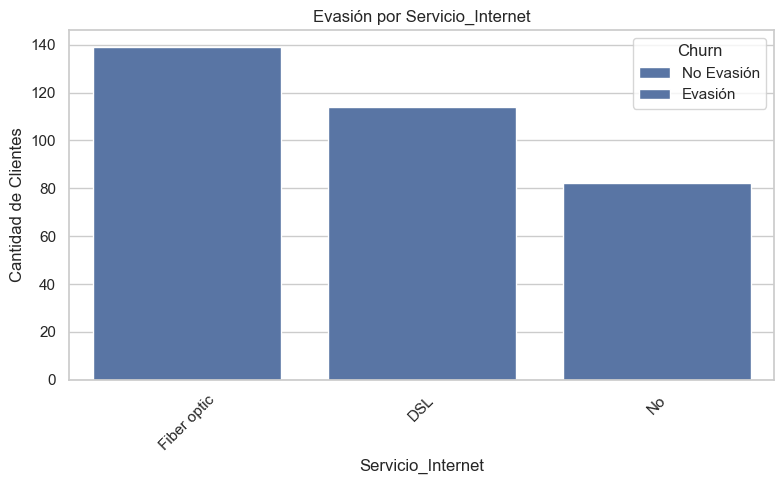

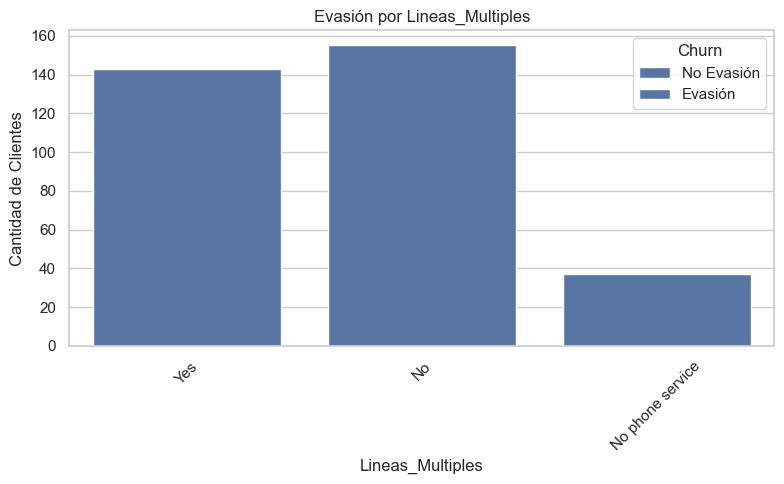

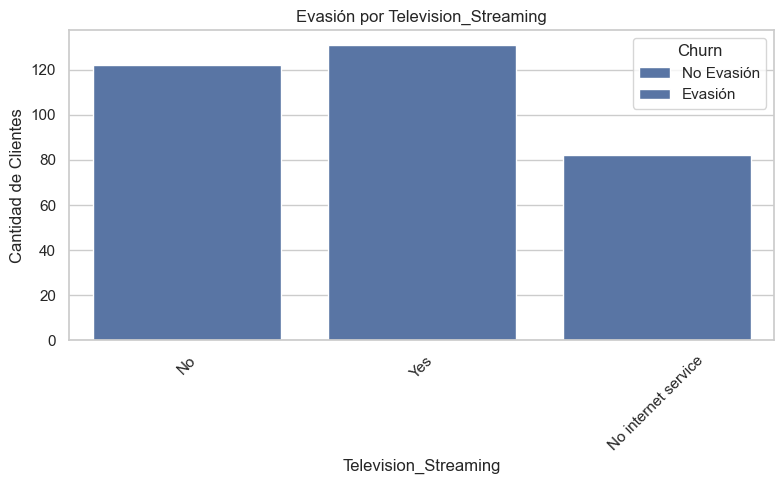

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'Churn' sea categórica (0 = No Evasión, 1 = Evasión)
df['Churn'] = df['Churn'].fillna(0)  # Opcional: reemplaza NaNs si es necesario
df['Churn'] = df['Churn'].astype(int)

# Lista de columnas categóricas a analizar
columnas_categoricas = [
    'Genero',
    'Tipo_Contrato',
    'Metodo_Pago',
    'Servicio_Internet',
    'Lineas_Multiples',
    'Television_Streaming',
    'Pelicula_Streaming'  # Puedes eliminar o comentar esta línea si no existe
]

# Filtrar solo columnas que existen en el DataFrame
columnas_existentes = [col for col in columnas_categoricas if col in df.columns]

# Configuración de estilo
sns.set(style="whitegrid")

# Graficar cada variable categórica con separación por 'Churn'
for columna in columnas_existentes:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=columna, hue='Churn')
    plt.title(f'Evasión por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Churn', labels=['No Evasión', 'Evasión'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


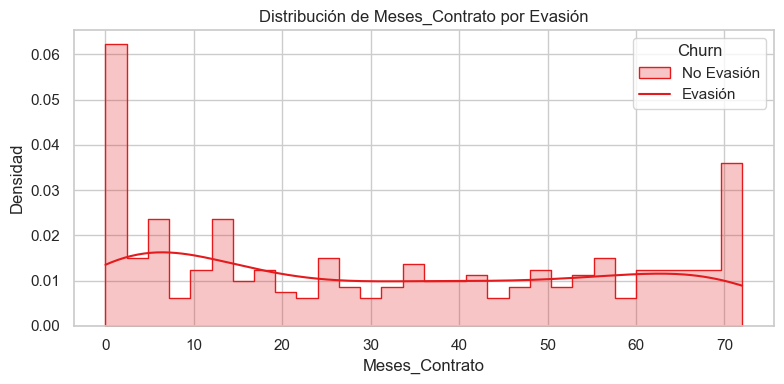

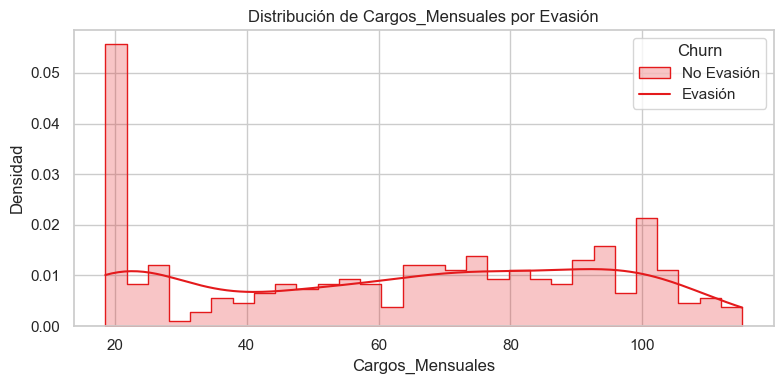

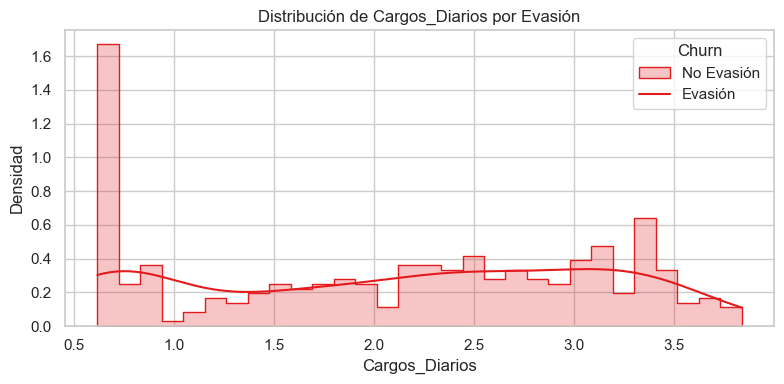

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas numéricas a analizar
variables_numericas = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Diarios']

# Gráficos de distribución por variable numérica
for columna in variables_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=columna, hue='Churn', bins=30,
                 kde=True, palette='Set1', element='step', stat='density')
    plt.title(f'Distribución de {columna} por Evasión')
    plt.xlabel(columna)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['No Evasión', 'Evasión'])
    plt.tight_layout()
    plt.show()



#📄Informe final

# 📊 Informe Final - Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

Este análisis tiene como objetivo comprender los factores que influyen en la **evasión de clientes (Churn)** en una empresa de telecomunicaciones. La evasión representa la cancelación del servicio por parte de los usuarios, lo que impacta directamente en los ingresos y crecimiento del negocio. Identificar patrones asociados al churn permitirá tomar decisiones estratégicas para **reducir la pérdida de clientes**.

---

## 🔹 Limpieza y Tratamiento de Datos

Durante la fase de limpieza y tratamiento de datos, se realizaron los siguientes pasos:

- Se importaron los datos desde la fuente original.
- Se eliminaron filas y columnas con valores nulos o inconsistentes.
- Se estandarizaron nombres de columnas para mayor claridad.
- Se codificaron variables categóricas (como "Sí"/"No") a formato binario (1/0).
- Se transformaron columnas con formato no numérico a datos apropiados para el análisis.
- Se aseguraron tipos de datos correctos para cada variable.

---

## 🔹 Análisis Exploratorio de Datos (EDA)

Se realizaron múltiples análisis para comprender el comportamiento de los clientes y su relación con la evasión:

### ✔️ Distribución de la variable `Churn`
- Se visualizó la proporción de clientes que permanecen y los que se dieron de baja.

### ✔️ Evasión según variables categóricas
- Género, tipo de contrato, método de pago, y servicios contratados mostraron diferencias significativas en los niveles de churn.
- Clientes con contratos mensuales y métodos de pago por cheque electrónico tienen mayor tendencia a abandonar el servicio.

### ✔️ Evasión según variables numéricas
- Se analizaron columnas como `Meses_Contrato`, `Cargos_Mensuales` y `Cargos_Diarios`.
- Se observaron tendencias en donde clientes con menor tiempo de contrato y cargos mensuales más altos tienden a abandonar el servicio con mayor frecuencia.

Las visualizaciones incluyeron gráficos de barras, histogramas y boxplots para reforzar estos hallazgos.

---

## 🔹 Conclusiones e Insights

- La mayoría de los clientes que abandonan el servicio tienen contratos **mes a mes** y utilizan **métodos de pago menos automatizados**.
- Los clientes que permanecen tienden a tener contratos a largo plazo (1 o 2 años) y pagan por **transferencias automáticas** o **tarjetas de crédito**.
- Cargos mensuales elevados se asocian con una mayor tasa de evasión.
- Servicios adicionales como **streaming o soporte técnico** también parecen influir en la decisión de permanecer o abandonar.

---

## 🔹 Recomendaciones

Con base en el análisis realizado, se proponen las siguientes estrategias:

- **Incentivar contratos a largo plazo** mediante descuentos o beneficios exclusivos.
- **Promover métodos de pago automáticos**, facilitando el proceso para el cliente.
- **Analizar la percepción de valor en servicios con mayor evasión**, como televisión o soporte técnico.
- **Implementar programas de retención temprana** para clientes con pocos meses de antigüedad y cargos altos.
- Continuar con análisis predictivos para anticipar el churn y actuar proactivamente.

---

🚀 *Este análisis sienta las bases para una toma de decisiones orientada a la retención de clientes y mejora de servicios.*
